In [15]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET

In [16]:
df = pd.read_csv("../data/Exams_cleaned.csv")
df.head()

,Unnamed: 0,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Revenue,Desc Item,Category,Family,Speciality,Testing Cost,Address,Location,Zipcode,MargemBruta,rentabilidade
0,0,10210830256-BIO003,F,1976-08-01 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,7.22,4.056180
1,1,10210830256-BIO003,F,1976-08-01 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,10.54,4.284553
2,2,10210830256-BIO003,F,1976-08-01 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,46.89,22.222749
3,3,10210830256-BIO003,F,1976-08-01 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,10.20,12.750000
4,4,10210830256-BIO003,F,1976-08-01 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,8.98,8.803922


In [17]:
df['Date of birth'] = pd.to_datetime(df['Date of birth'], errors='coerce', format="%Y-%m-%d %H:%M:%S")
df['Date of birth'] = pd.to_datetime(df['Date of birth'], errors='coerce', format="%Y-%m-%d")
df['Date of service'] = pd.to_datetime(df['Date of service'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 19 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Unnamed: 0       int64         
 1   Patient Id       object        
 2   Gender           object        
 3   Date of birth    datetime64[ns]
 4   Date of service  datetime64[ns]
 5   Service Id       object        
 6   Lab Id           object        
 7   CodItem          int64         
 8   Revenue          float64       
 9   Desc Item        object        
 10  Category         object        
 11  Family           object        
 12  Speciality       object        
 13  Testing Cost     float64       
 14  Address          object        
 15  Location         object        
 16  Zipcode          float64       
 17  MargemBruta      float64       
 18  rentabilidade    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(10)
memory usage: 341.4+ MB


### ANALYSIS

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


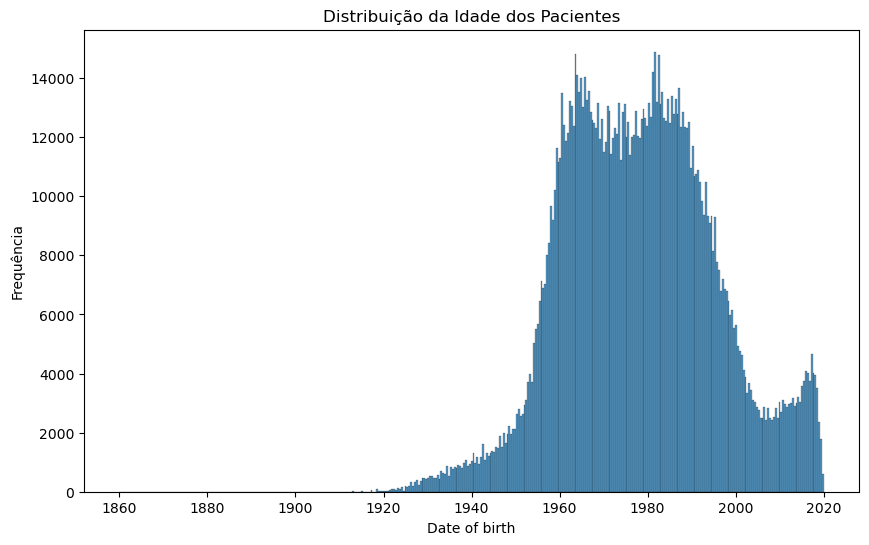

In [19]:
utils.distribuicaoSingle(df['Date of birth'], 'Distribuição da Idade dos Pacientes')

In [20]:
#utils.distribuicaoSingle2(df, 'Gender', 'Distribuição por gênero')

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


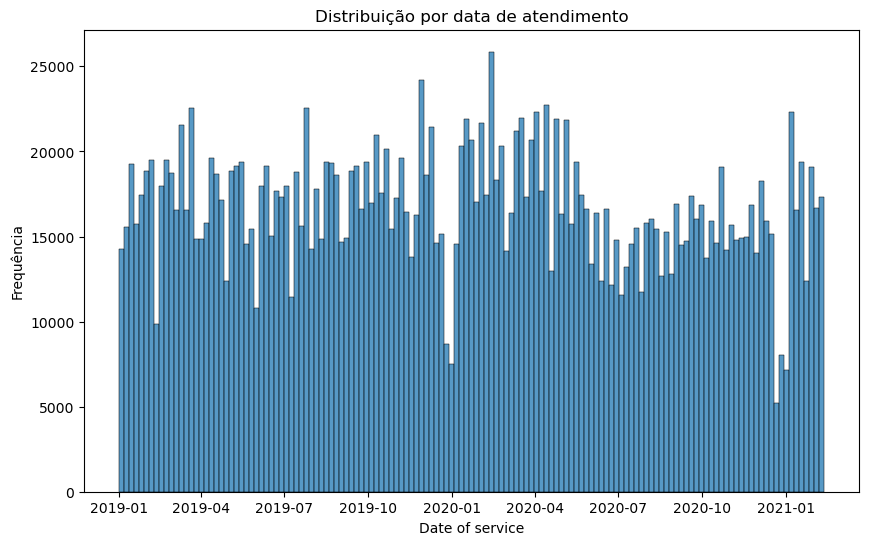

In [21]:
utils.distribuicaoSingle(df['Date of service'], 'Distribuição por data de atendimento')

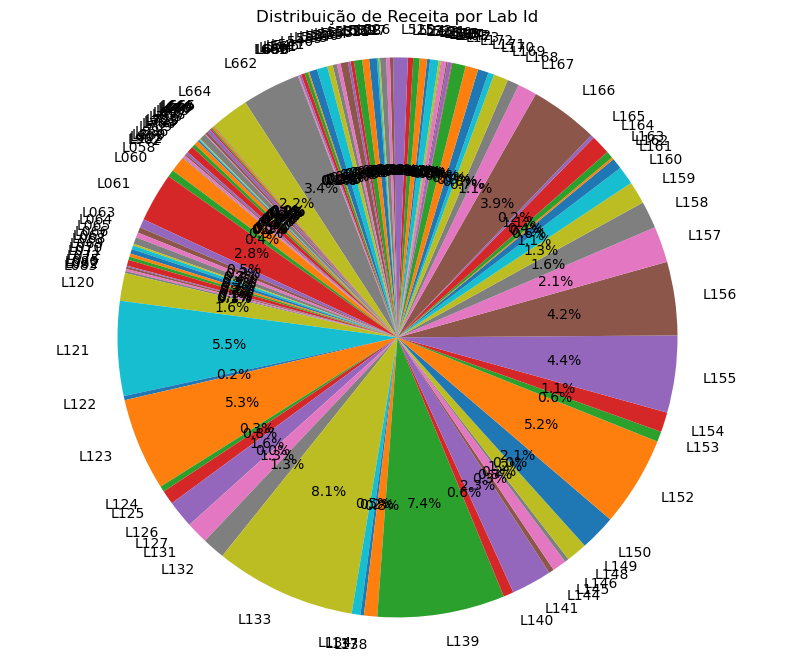

In [22]:
utils.pizza(df, 'Lab Id', 'Revenue')

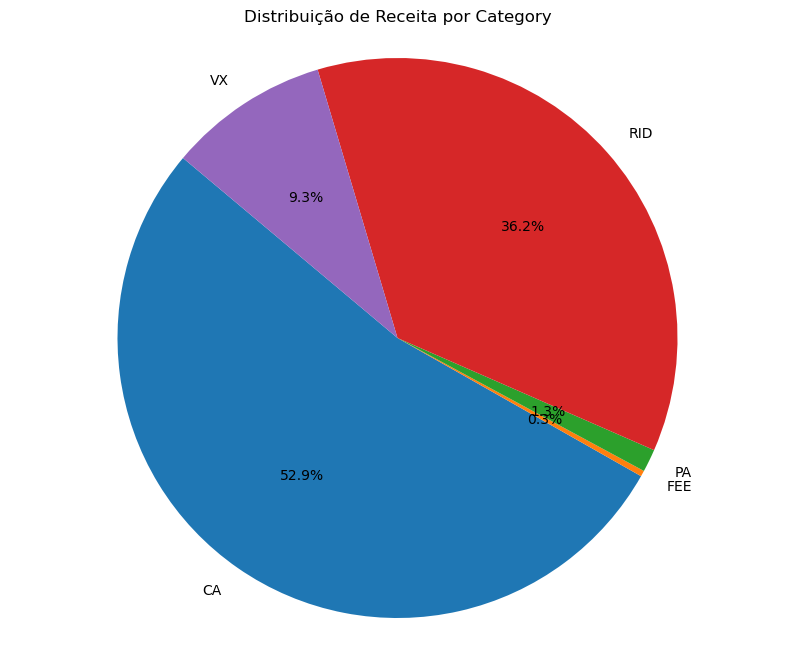

In [23]:
utils.pizza(df, 'Category', 'Revenue')

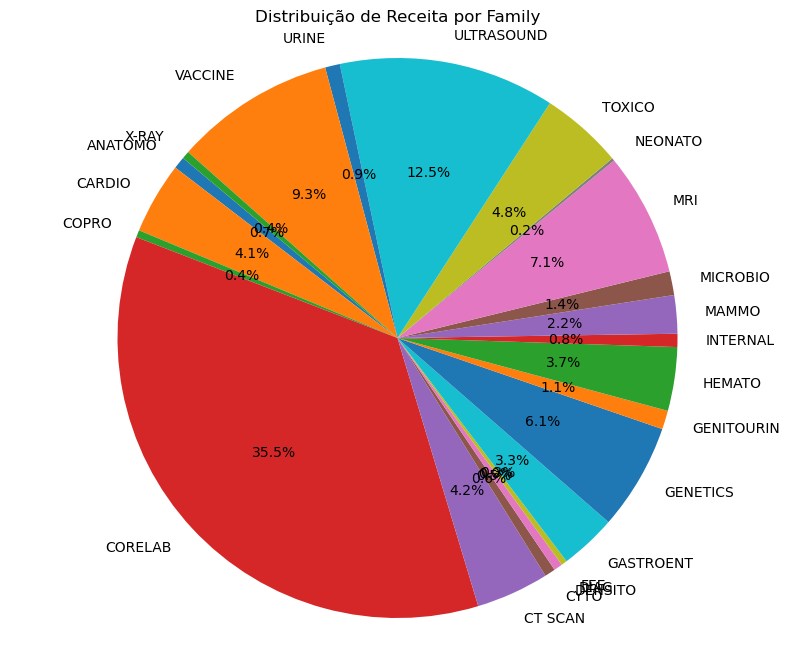

In [24]:
utils.pizza(df, 'Family', 'Revenue')

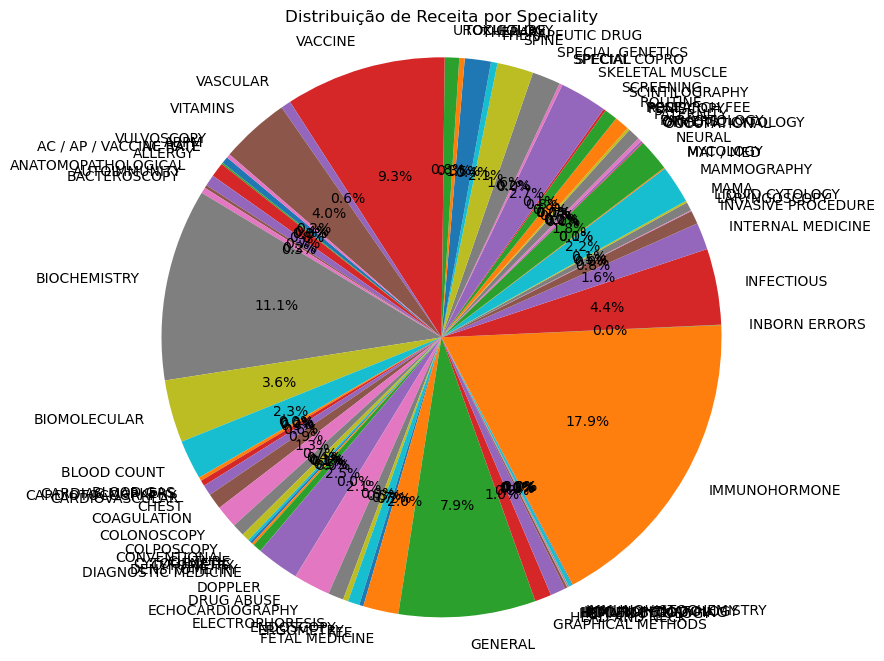

In [25]:
utils.pizza(df, 'Speciality', 'Revenue')

### SUMMARY

In [26]:
temp = df[['Speciality', 'MargemBruta', 'rentabilidade']]
temp = temp.drop_duplicates()
temp = temp.sort_values(by='MargemBruta', ascending=False)
temp.head(10)

,Speciality,MargemBruta,rentabilidade
934526,SPECIAL GENETICS,8009.23,5.372546
105670,SPECIAL GENETICS,6644.64,10.976345
105609,SPECIAL GENETICS,6071.81,5.153507
105666,SPECIAL GENETICS,5341.94,7.544474
105665,SPECIAL GENETICS,5130.38,5.578804
39810,SPECIAL GENETICS,5076.13,8.923181
39950,SPECIAL GENETICS,5063.78,27.192461
105667,SPECIAL GENETICS,4977.28,18.591364
105671,SPECIAL GENETICS,4922.17,17.716481
105672,SPECIAL GENETICS,4910.56,49.382140


In [27]:
temp2 = temp[temp['Speciality'] != 'SPECIAL GENETICS']
temp2 = temp2.sort_values(by='MargemBruta', ascending=False)
temp2.head(10)

,Speciality,MargemBruta,rentabilidade
105596,IMMUNOHORMONE,3163.97,8.217464
39989,CYTOGENETIC,3156.32,6.085293
39985,CYTOGENETIC,2697.48,13.319573
106557,BIOMOLECULAR,2455.03,11.010584
39889,BIOMOLECULAR,1853.43,2.247753
40030,BIOMOLECULAR,1726.13,23.367131
109518,INVASIVE PROCEDURE,1565.42,1.244788
221601,INBORN ERRORS,1558.88,32.395677
106425,CYTOGENETIC,1497.34,562.909774
106430,CYTOGENETIC,1414.56,14.083632


In [28]:
temp = temp.sort_values(by='rentabilidade', ascending=False)
temp.head(10)

,Speciality,MargemBruta,rentabilidade
781867,BLOOD COUNT,10.99,1099.000000
106425,CYTOGENETIC,1497.34,562.909774
106680,SPECIAL GENETICS,808.98,400.485149
106334,IMMUNOHORMONE,293.21,371.151899
7764,VACCINE,72.76,303.166667
161612,SPECIAL GENETICS,4682.72,270.990741
39972,IMMUNOHORMONE,167.29,235.619718
39772,IMMUNOHORMONE,293.34,176.710843
1194567,BIOCHEMISTRY,82.52,171.916667
105324,BIOCHEMISTRY,31.80,159.000000
